# Visualise distribution of Computational Neuroscience around the globe

## Install dependencies

In [1]:
!rm requirements.txt
!echo "requests\nrequests-xml\npandas\nbokeh\nseaborn" >> requirements.txt
!python -m pip install -r requirements.txt

tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
tensorflow 1.4.1 has requirement tensorflow-tensorboard<0.5.0,>=0.4.0rc1, but you'll have tensorflow-tensorboard 0.1.5 which is incompatible.


## Imports

In [2]:
import sys
# must be version >= 3.6 for format literals and requests-xml
assert sys.version_info.major>=3 and sys.version_info.minor>=6
import os
# import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from requests_xml import XMLSession
requests = XMLSession()

## Figure settings

In [3]:
from collections import namedtuple
from matplotlib import rcParams

class settings(object):
    SMALLEST_SIZE = 6
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    LARGE_SIZE = 12
    BIGGER_SIZE = 14
    BIGGEST_SIZE = 16
    FIG_SIZE = (16, 10)
    FIG_RES_ADJUST = 1  # for 4 for 4K

def set_figure_dpi(dpi=None, figure_formats=['png2x']):
    """Set resolution and format of figures.

    Parameters
    ----------
    dpi : int, optional
        Resolution of png output in dots per inch.
    figure_formats : list of strings
        Only concerns the IPython environment; see
        `IPython.core.display.set_matplotlib_formats` for more details. For
        setting the default format for saving figures, directly set
        `file_format_figs`.
    """
    try:
        import IPython
        IPython.core.display.set_matplotlib_formats(*figure_formats)
    except:
        pass
    global _dpi
    if dpi is not None: _dpi = dpi
    # need to set the following two lines as older Jupyter notebooks seem to use
    # 'savefig.dpi' and more rescent ones 'figure.dpi'
    rcParams['savefig.dpi'] = _dpi
    rcParams['figure.dpi'] = _dpi

rcParams['pdf.fonttype'] = 42  # Output Type 3 (Type3) or Type 42 (TrueType)
plt.rc('font', family='sans serif', size=settings.MEDIUM_SIZE)  # controls default text sizes
rcParams['text.latex.unicode'] = True
rcParams['axes.titlesize'] = settings.BIGGEST_SIZE  # fontsize of the axes title
rcParams['axes.labelsize'] = settings.BIGGER_SIZE  # fontsize of the x and y labels
rcParams['xtick.labelsize'] = settings.MEDIUM_SIZE  # fontsize of the tick labels
rcParams['ytick.labelsize'] = settings.LARGE_SIZE  # fontsize of the tick labels
rcParams['legend.fontsize'] = settings.BIGGER_SIZE  # legend fontsize
rcParams['figure.titlesize'] = settings.BIGGEST_SIZE  # fontsize of the figure title
set_figure_dpi(settings.FIG_RES_ADJUST * rcParams['figure.dpi'])

## Define search terms

In [4]:
all_comp_search_term = '(computational OR mathematical OR theoretical) AND neuroscience'.replace(" ","+")
all_neuro_search_term = 'neuroscience'

## Globals

In [5]:
force_search = False # ignores presence of file
file_name = "comp_neuro_viz_data.csv"
file_exists = os.path.exists(file_name) and not force_search
file_exists

False

## Load country codes from a csv file

data is from https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes

In [6]:
country_codes = pd.read_csv("https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/raw/master/all/all.csv")
# fix NAMIBIA and USA
country_codes = country_codes.fillna("NA")
# USA exception: https://www.nlm.nih.gov/bsd/mms/medlineelements.html#ad
country_codes['alpha-2'] = country_codes['alpha-2'].replace('US','USA')

country_codes['name'] = country_codes['name'].replace('United States of America','USA')
country_codes['name'] = country_codes['name'].replace('United Kingdom of Great Britain and Northern Ireland',
                                                      'UK')
country_codes['name'] = country_codes['name'].replace("Lao People's Democratic Republic","Laos")
# remove parentheses
country_codes['name'] = country_codes['name'].str.replace(r"\(.*\)","")
country_codes

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NA,142,34,NA
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NA,150,154,NA
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NA,150,39,NA
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NA,2,15,NA
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NA,9,61,NA
5,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NA,150,39,NA
6,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2,202,17
7,Anguilla,AI,AIA,660,ISO 3166-2:AI,Americas,Latin America and the Caribbean,Caribbean,19,419,29
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NA,NA,NA,NA,NA,NA
9,Antigua and Barbuda,AG,ATG,28,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19,419,29


## Function to get number of results from PubMed for a given search term

In [7]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term="
def get_number_results_from_pubmed(base_search_term, country_name=None, _num_tries=0):
    try:

        if country_name is None:
            result = requests.get(f'{base_url}{base_search_term}')
        else:
            result = requests.get(f'{base_url}{base_search_term}+AND+("{country_name}"[ad]')
    except ConnectionError as e:
        if _num_tries>10:
            raise
        else:
            return get_number_results_from_pubmed(base_search_term, 
                                                  country_name=country_name, 
                                                  _num_tries=_num_tries+1)
    assert result.status_code == 200, print(r)
    return int(result.xml.xpath("//eSearchResult//Count", first=True).text)
# test it works
r = get_number_results_from_pubmed(all_comp_search_term,"South Africa")
print(f"Number of publications from South Africa is *{r}*")

Number of publications from South Africa is *69*


## Iterate through countries to get their counts

In [10]:
if file_exists:
    print("reading from file")
    df = pd.read_csv(file_name, index_col=0)
else:
    print("retrieving from pubmed")
    values = country_codes[['name','alpha-2']].sort_values(by='alpha-2').values
    df = pd.DataFrame({'name':country_codes['name'].values},
                      columns=['name','count_cn','count_neuro'],
                      index=country_codes['alpha-2'])
    for name,short in values:
        print(short,end="\t")
        df.loc[short,'region'] = country_codes[country_codes['alpha-2']==short].region.values[0]
        df.loc[short,'count_cn'] = get_number_results_from_pubmed(all_comp_search_term,name)
        df.loc[short,'count_neuro'] = get_number_results_from_pubmed(all_neuro_search_term,name)
    df.loc['total','count_cn'] = get_number_results_from_pubmed(all_comp_search_term)
    df.loc['total','count_neuro'] = get_number_results_from_pubmed(all_neuro_search_term)
    df.to_csv(file_name)
    print("done")
total_cn = df.loc['total','count_cn']
total_neuro = df.loc['total','count_neuro']
df = df.drop(['total'])
df = df.drop(labels=['JE','MF','SX','GE']) # drop no flags (and US States [JE,GE])


retrieving from pubmed
AD	AE	AF	AG	AI	AL	AM	AO	AQ	AR	AS	AT	AU	AW	AX	AZ	BA	BB	BD	BE	BF	BG	BH	BI	BJ	BL	BM	BN	BO	BQ	BR	BS	BT	BV	BW	BY	BZ	CA	CC	CD	CF	CG	CH	CI	CK	CL	CM	CN	CO	CR	CU	CV	CW	CX	CY	CZ	DE	DJ	DK	DM	DO	DZ	EC	EE	EG	EH	ER	ES	ET	FI	FJ	FK	FM	FO	FR	GA	GB	GD	GE	GF	GG	GH	GI	GL	GM	GN	GP	GQ	GR	GS	GT	GU	GW	GY	HK	HM	HN	HR	HT	HU	ID	IE	IL	IM	IN	IO	IQ	IR	IS	IT	JE	JM	JO	JP	KE	KG	KH	KI	KM	KN	KP	KR	KW	KY	KZ	LA	LB	LC	LI	LK	LR	LS	LT	LU	LV	LY	MA	MC	MD	ME	MF	MG	MH	MK	ML	MM	MN	MO	MP	MQ	MR	MS	MT	MU	MV	MW	MX	MY	MZ	NA	NC	NE	NF	NG	NI	NL	NO	NP	NR	NU	NZ	OM	PA	PE	PF	PG	PH	PK	PL	PM	PN	PR	PS	PT	PW	PY	QA	RE	RO	RS	RU	RW	SA	SB	SC	SD	SE	SG	SH	SI	SJ	SK	SL	SM	SN	SO	SR	SS	ST	SV	SX	SY	SZ	TC	TD	TF	TG	TH	TJ	TK	TL	TM	TN	TO	TR	TT	TV	TW	TZ	UA	UG	UM	USA	UY	UZ	VA	VC	VE	VG	VI	VN	VU	WF	WS	YE	YT	ZA	ZM	ZW	done


## Some cleaning

In [11]:
# sort by country code
df = df.sort_index()
# drop zeros
truthy = (df==0).any(axis=1)
countries_with_no_cn = df.loc[truthy]
df = df.loc[~truthy]
df

,name,count_cn,count_neuro,region
alpha-2,,,,
AE,United Arab Emirates,15,141,Asia
AF,Afghanistan,1,7,Asia
AM,Armenia,1,15,Asia
AR,Argentina,81,1032,Americas
AT,Austria,229,2296,Europe
AU,Australia,852,14585,Oceania
BA,Bosnia and Herzegovina,1,22,Europe
BB,Barbados,1,2,Americas
BD,Bangladesh,9,91,Asia


## Some basic arithmetic

In [12]:
summed = df[['count_cn','count_neuro']].sum()
total_cn_sum = summed['count_cn']
total_neuro_sum = summed['count_neuro']

# print(df)
df['cn vs neuro'] = 100*df['count_cn']/(df['count_neuro'])
df['cn vs world'] = 100*df['count_cn']/total_cn
df['neuro vs world'] = 100*df['count_neuro']/total_neuro
df['cn vs neuro vs world'] = df['cn vs neuro'] / (total_cn/total_neuro)
world_cn_v_neuro = 100*total_cn/total_neuro
print(f"Percentage of Neuroscience that is Computational Neuroscience (for world) = {world_cn_v_neuro:.2f}%")
print("\nExample data for South Africa (ZA)")
print(df.loc['ZA'])
print(f"""
total Comp Neuro
    from search = {total_cn}
    from sum    = {total_cn_sum}""")
print(f"""
total Neuro
    from search = {total_neuro}
    from sum    = {total_neuro_sum}""")

Percentage of Neuroscience that is Computational Neuroscience (for world) = 5.43%

Example data for South Africa (ZA)
name                    South Africa
count_cn                          69
count_neuro                      760
region                        Africa
cn vs neuro                  9.07895
cn vs world                 0.381026
neuro vs world              0.227854
cn vs neuro vs world         167.224
Name: ZA, dtype: object

total Comp Neuro
    from search = 18109
    from sum    = 24628.0

total Neuro
    from search = 333547
    from sum    = 376037.0


## Pie plots

**WARNING**

from http://python-graph-gallery.com/pie-plot/

> Pie chart is easily the worst way to convey information ever developed in the history of data visualization. Thus, it must be avoided and replaced with barplot most of the time. Indeed, it is really difficult for a human to make the difference between the size of similar slices. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f187c14d518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f183db61b00>], dtype=object)

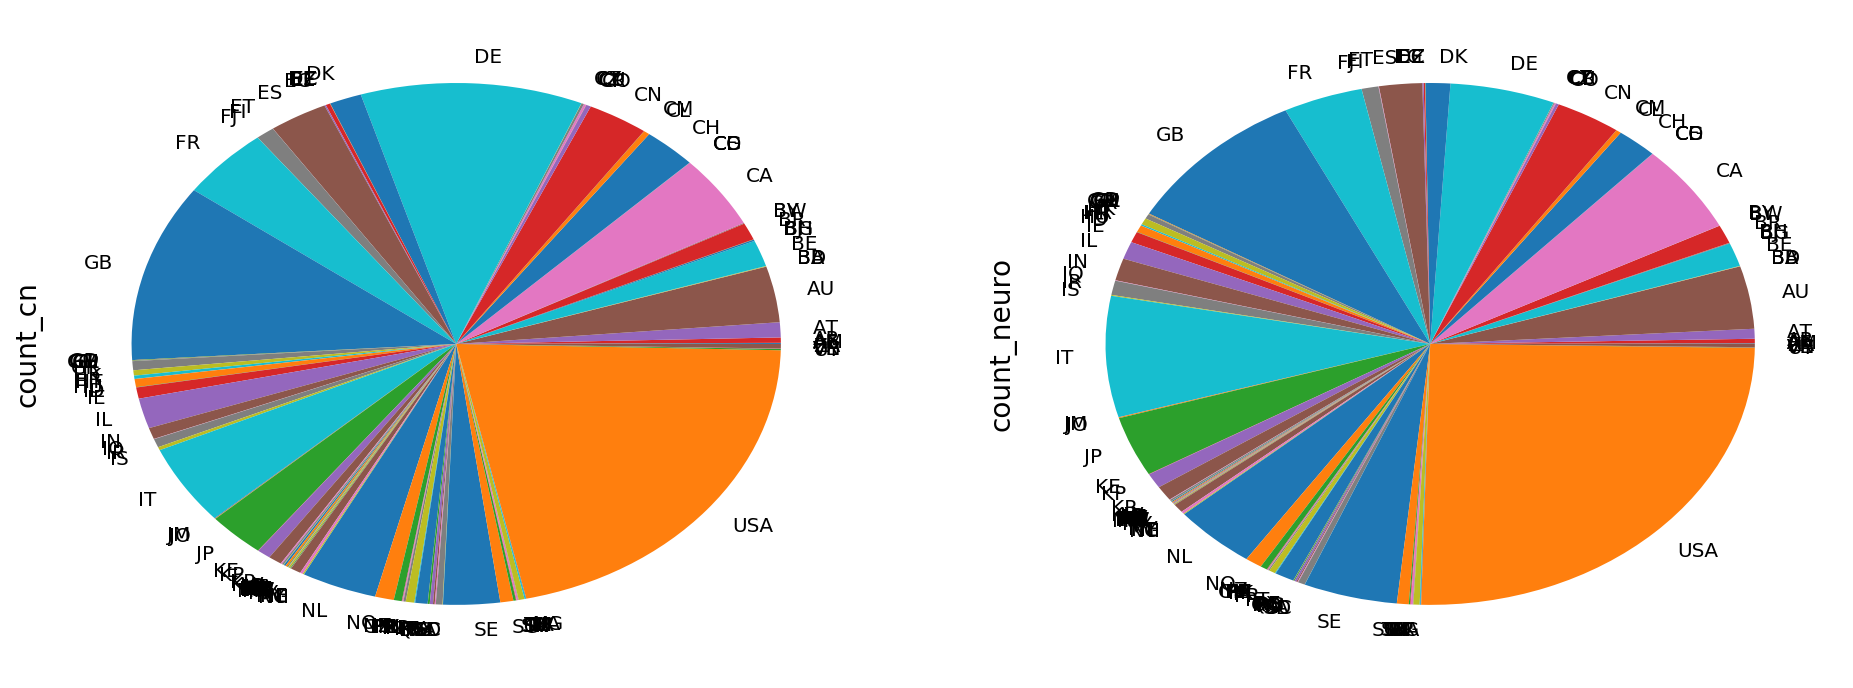

In [13]:
df[['count_cn','count_neuro']].plot(kind='pie', subplots=True, figsize=(16, 6),legend=False)

### Sort by Computational Neuroscience output

In [14]:
df.sort_values(by='count_cn',ascending=False).head(10)

,name,count_cn,count_neuro,region,cn vs neuro,cn vs world,neuro vs world,cn vs neuro vs world
alpha-2,,,,,,,,
USA,USA,5208,94770,Americas,5.49541,28.7592,28.4128,101.219
DE,Germany,2722,19578,Europe,13.9034,15.0312,5.86964,256.084
GB,UK,2713,35061,Europe,7.73794,14.9815,10.5116,142.524
IT,Italy,1220,28149,Europe,4.33408,6.73698,8.43929,79.8288
CA,Canada,1118,20677,Americas,5.40697,6.17373,6.19913,99.5903
FR,France,1106,14884,Europe,7.4308,6.10746,4.46234,136.867
NL,Netherlands,923,15437,Europe,5.97914,5.09691,4.62813,110.129
AU,Australia,852,14585,Oceania,5.84162,4.70484,4.3727,107.596
CN,China,743,12179,Asia,6.10067,4.10293,3.65136,112.367


### Sort by Neuroscience output

In [15]:
df.sort_values(by='count_neuro',ascending=False).head(10)

,name,count_cn,count_neuro,region,cn vs neuro,cn vs world,neuro vs world,cn vs neuro vs world
alpha-2,,,,,,,,
USA,USA,5208,94770,Americas,5.49541,28.7592,28.4128,101.219
GB,UK,2713,35061,Europe,7.73794,14.9815,10.5116,142.524
IT,Italy,1220,28149,Europe,4.33408,6.73698,8.43929,79.8288
CA,Canada,1118,20677,Americas,5.40697,6.17373,6.19913,99.5903
DE,Germany,2722,19578,Europe,13.9034,15.0312,5.86964,256.084
SE,Sweden,695,17574,Europe,3.95471,3.83787,5.26882,72.8411
NL,Netherlands,923,15437,Europe,5.97914,5.09691,4.62813,110.129
FR,France,1106,14884,Europe,7.4308,6.10746,4.46234,136.867
AU,Australia,852,14585,Oceania,5.84162,4.70484,4.3727,107.596


## Lollipop graphs

In [16]:
%matplotlib notebook
my_range=range(1,len(df.index)+1)

df['count'] = df['count_cn']+df['count_neuro']
df = df.sort_values(by=['count_neuro','count_cn'])

### main code block

In [17]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
from matplotlib.ticker import FormatStrFormatter,ScalarFormatter
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

def plot_lollipop(ordered_df,figsize=(10,10),log=True,hlines=False,
                  zoom_factor=3,num_in_zoom=3,indices=None,
                 labels=None,bold_labels=None):
    %matplotlib inline
    alpha=1
    my_range=range(1,len(ordered_df.index)+1)
    
    neuro_max_lim = ordered_df['count_neuro'].max()
    cn_max_lim = ordered_df['count_cn'].max()
    if not log:
        neuro_max_lim +=100
        cn_max_lim+=10
    factor = neuro_max_lim/cn_max_lim
    
    # Change color if in Africa
    my_size=np.where(ordered_df['region']=='Africa', 30, 30)
    my_color=np.where(ordered_df['region']=='Africa', 'orange', 'skyblue') # or skyblue
    indx_africa = np.where(my_color=='orange')[0][0]
    indx_row = np.where(my_color=='skyblue')[0][0]
    africa = ordered_df[ordered_df['region']=='Africa']['count_neuro'].head(1)
    row = ordered_df[ordered_df['region']!='Africa']['count_neuro'].head(1)
    
    fig,ax = plt.subplots(1,1,figsize=figsize,sharey=True)
    
    # create zooms
    if indices is None:
        indices = [0,'South Africa',-1]
    locs = ['upper left','center right', 'lower right']
    axins = []
    for i in range(len(indices)):
        if i<len(locs):
            loc=locs[i]
        else:
            loc='best'
        axins.append(zoomed_inset_axes(ax, zoom_factor, loc=loc))
    
    if log:
#         ordered_df[['count_cn','count_neuro']] = np.log10(ordered_df[['count_cn','count_neuro']])
        for i, ax_i in enumerate([ax]+axins):
            ax_i.set_xscale('log')
    
    # do some formatting of the axis before possible duplication with twiny()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    cols = {'count_cn':"Computational Neuroscience",'count_neuro':"Neuroscience"}

    # because of the zooms, points are plotted multiple times (otherwise 'zoom' views would be empty)
    for i, ax_i in enumerate([ax]+axins):
        # plot specific points for legend
        ax_i.scatter([], [], color='orange', s=my_size*(4 if i>=0 else 1), alpha=alpha, 
                   label='Africa')
        ax_i.scatter([], [], color='skyblue', s=my_size*(4 if i>=0 else 1), alpha=alpha, 
                   label='Rest of World')
        # plot computational neuroscience points
        ax_i.scatter(ordered_df['count_cn'], my_range, color=my_color, s=my_size*(4 if i>0 else 1), alpha=alpha, 
                   label=cols['count_cn'])
    
    
    if not log:
        # create a second axis for the other count
        # set formatting options before 'twiny'
        
        ax.set_xlim([0,cn_max_lim])
        ax.legend(loc='left')
        ax.grid(axis='x')
        ax.set_xlabel(f'# Computational Neuroscience Publications')
        ax.autoscale(True)
        
        ax = ax.twiny()
        # use original frame
        ax.set_frame_on(False)
        
    for i, ax_i in enumerate([ax]+axins):
        # plot neuroscience points
        ax_i.scatter(ordered_df['count_neuro'], my_range, color=my_color, marker='s', s=my_size*(4 if i>0 else 1), 
                     alpha=alpha, 
                     label=cols['count_neuro'])
    
    
#     ax.set_xlim([0,neuro_max_lim])

    if hlines:
        # draw connections between "computational neuroscience" and "neuroscience" publications counts
        if log:
            xmin = ordered_df['count_cn']
        else:
            xmin = ordered_df['count_cn']*factor
        xmax = ordered_df['count_neuro']
        for ax_i in [ax]+axins:
            ax_i.hlines(y=my_range, xmin=xmin, xmax=xmax, 
                  color='grey', 
                  alpha=0.3)

    ax.get_xaxis().set_label_position('bottom')
    ax.get_xaxis().set_ticks_position('bottom')
    if log:
        # change scale to 1,10,100,etc. instead of 10^0,10^1,10^2,etc.
        ax.get_xaxis().set_major_formatter(FormatStrFormatter("%.0f"))
        ax.set_xlabel('$log_{10}\# $ publications')
        ax.spines['left'].set_color('none')
        ax.get_yaxis().set_visible(False)
    else:
        # adjust 2nd xaxis a little
        ax.spines['bottom'].set_position(('axes', -0.01*figsize[1]))
        # Add title and axes names
        ax.set_xlabel(f'# Neuroscience Publications')
        ax.set_yticks(my_range)
        ax.set_yticklabels(ordered_df['name']+' ('+ordered_df.index+')')
        ax.set_ylabel('Country Code')
        ax.get_yaxis().set_visible(True)
   
    
    l = ax.legend(bbox_to_anchor=(0., 1., 1., .05), loc='upper center',
                        ncol=4, 
                        mode="expand", 
                        borderaxespad=0.)
    l.set_frame_on(False)
    ax.set_ylim([0,my_range[-1]+1])
    ax.set_xlim(0.5) # apply the x-limits
#     ax.grid(axis='x')
#     ax.autoscale(True)

    # zooms
    x_min = 'count_cn'
    x_max = ['count_cn','count_neuro'][0]
    for i, axin in zip(indices,axins):
        if i==0:
            top_x = ordered_df.iloc[-num_in_zoom:]
            top_y = my_range[-num_in_zoom:]
        elif i==-1:
            top_x = ordered_df.iloc[:num_in_zoom]
            top_y = my_range[:num_in_zoom]
        else:
            if type(i) is str:
                i=np.where(ordered_df['name']==i)[0][0]
            adjust = int((num_in_zoom-1)/2)
            top_x = ordered_df.iloc[i-adjust:i+1+adjust]
            top_y = my_range[i-adjust:i+1+adjust]
        x1, x2, y1, y2 = np.min(top_x[x_min]),np.max(top_x[x_max]),np.min(top_y),np.max(top_y)
    #     3.7, 4.6 # specify the limits
        axin.set_xlim(x1-x1/10, x2+x2/4) # apply the x-limits
        axin.set_ylim(y1-1, y2+1) # apply the y-limits

        axin.set_xticks([])
        axin.get_xaxis().set_visible(False)
        axin.set_yticks(top_y)
        y_labels =[]
        size = len(df)+1
        for name, number in zip(top_x['name'],top_y):
            y_labels.append(f'{name}')
        axin.set_yticklabels(y_labels)
        
        for label, x, y, indx in zip(df[df.index.isin(top_x.index)][x_min], 
                               top_x[x_min].values, 
                               top_y,
                               top_x.index.values):
            indx = indx.lower()
            if indx == 'usa':
                indx='us'
            try:
                arr_img = plt.imread(f"famfamfam_flag_icons/png/{indx}.png", format='png')
            except:
                print(indx)
                continue
            axin.annotate(
                label,
                xy=(x, y), xytext=(10, 0),
                textcoords='offset points', ha='left', va='center'
        #         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
                )

            imagebox = OffsetImage(arr_img, zoom=1)
            imagebox.image.axes = ax
            ab = AnnotationBbox(imagebox, (x, y),
                                xybox=(x, y),
                                xycoords="data",
                                boxcoords="data",
                                pad=0.,
#                                 arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=-0',
#                                                 alpha=0.3)
                                )

            axin.add_artist(ab)
            
            
        if x_min != x_max:
            for label, x, y in zip(df[df.index.isin(top_x.index)][x_max], 
                                   top_x[x_max].values, 
                                   top_y):
                axin.annotate(
                label,
                xy=(x, y), xytext=(-10, 6),
                textcoords='offset points', ha='right', va='center',
                bbox=dict(boxstyle='square,pad=0.2', fc='skyblue', alpha=0.5),
        #         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
                )

        # link zooms to main axis
        mark_inset(ax, axin, loc1=1, loc2=2, fc="none", ec="0.5")
    if bold_labels is None:
        bold_labels = []
    if labels is not None:
        y_max = my_range[-1]+1
        for label in labels:
            if type(label) is str:
                i=np.where(ordered_df['name']==label)[0][0]
            else:
                i=label
                label = ordered_df.iloc[i]['name']
            x = ordered_df.iloc[i]['count_cn']
            y = my_range[i]
            xy = (x-x/20,y)
            xy_offset=(0.5,y)
            
            format_option=[
                f"{label:>10} {x:>10g}",
                f"{x:g}",
                           ][1]
            
            alpha = 1
            if i not in bold_labels:
                # 50% opacity
                alpha=0.5
            
            # add flag
            indx = ordered_df.iloc[i].name.lower()
            if indx == 'usa':
                indx='us'
            try:
                arr_img = plt.imread(f"famfamfam_flag_icons/png/{indx}.png", format='png')
            except:
                print(indx,ordered_df.iloc[i]['name'])
                continue
            else:               
                ax.annotate(
                    label,
                    xy=xy_offset, 
                    xytext=(-15,0),textcoords='offset points', 
                    ha='right', va='center',
                    size=settings.LARGE_SIZE,
                    alpha=alpha,
                    bbox=dict(boxstyle='round,pad=0.2', 
                              fc='skyblue', 
                              alpha=0),
                )
                ax.annotate(
                    format_option,
                    xy=xy_offset, 
                    xytext=(40,6),textcoords='offset points', 
                    ha='right', va='center',
                    alpha=alpha,
                    bbox=dict(boxstyle='round,pad=0.2', 
                              fc='skyblue', 
                              alpha=0),
                )
                imagebox = OffsetImage(arr_img, zoom=1)
                imagebox.image.axes = ax
                xy = xy
                ab = AnnotationBbox(imagebox, xy,
                                    xybox=xy_offset,
                                    xycoords="data",
                                    boxcoords="data",
                                    pad=0.,
                                    arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=-0',
                                                    alpha=0.09)
                                    )

                ax.add_artist(ab)
#                 ax.grid('on')
#     fig.tight_layout()
    

### Graph

[2, 4, 5, 6, 11, 13, 15, 17, 19, 21, 23, 24, 25, 26, 27, 30, 31, 37, 45, 47, 52, 57, 61, 68, 71, 79, 88]


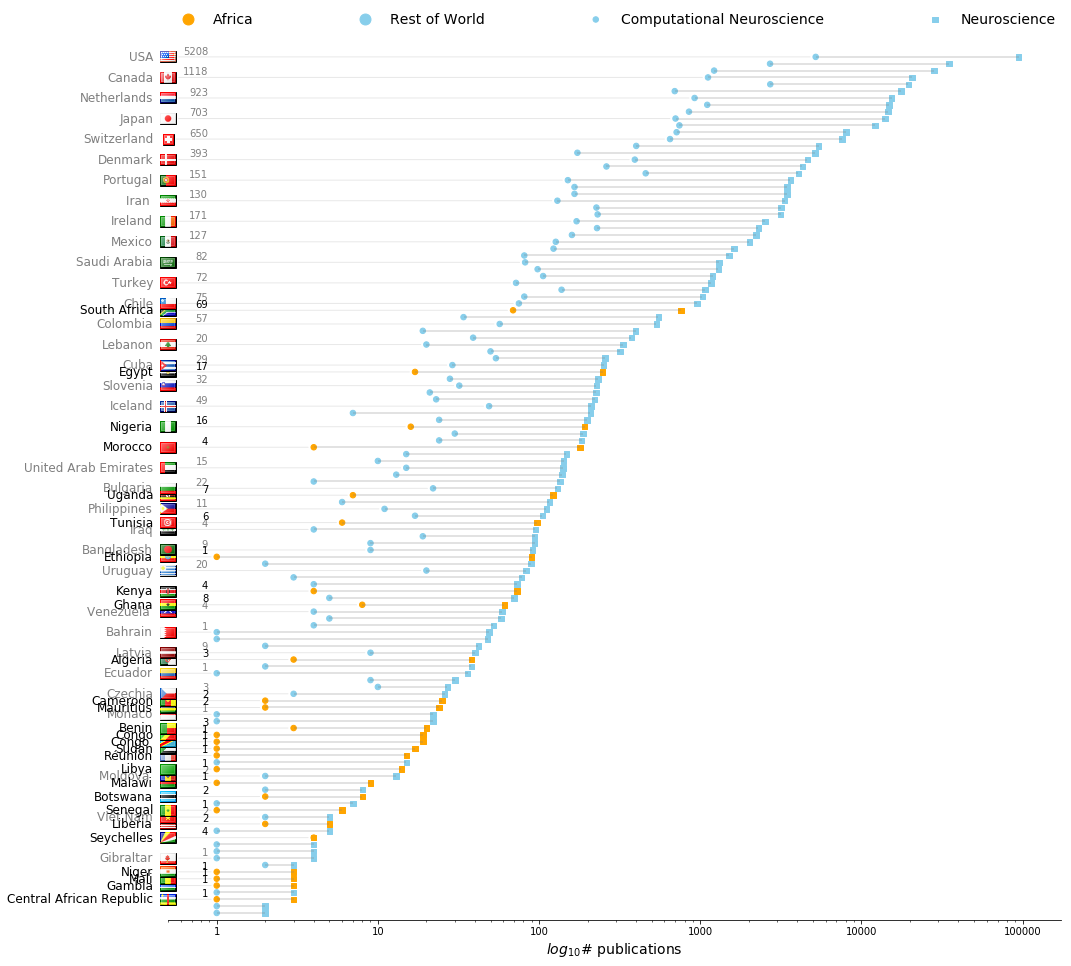

In [18]:
df = df.sort_values(by=['count_neuro','count_cn'])
temp = df[df['count_neuro']>0]
initial = list(np.where(df['region']=='Africa')[0])
print(initial)
start, stop = 2,temp.index.size
# stop+=step
step=3
labels = set(list(range(start, stop, step))+initial)
plot_lollipop(temp,
              figsize=(16,16),
              hlines=True,
              num_in_zoom=5,
              indices=[],
              labels=labels,
              bold_labels=initial)
plt.savefig("graph.svg", dpi='figure', facecolor=None, edgecolor='w',
        orientation='portrait', papertype='A4', format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.1,
        frameon=False)
plt.show()

## Visualise as World Map

In [19]:
from collections import OrderedDict
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import show, export_svgs, output_notebook

In [20]:
country_xs = []
country_ys = []
country_names = []
country_cn = []
country_neuro = []

r = requests.get('https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson')
geodata = r.json()
geodata_features = geodata['features']
for i,aCountry in enumerate(geodata_features):
    cName = aCountry['properties']['name']
    alpha2 = aCountry['properties']['wb_a2']
    if alpha2=='US':
        alpha2="USA"
    if alpha2 in df.index.values:
        counts = df.loc[alpha2,['count_cn','count_neuro']]
        count_cn = counts['count_cn']
        count_neuro = counts['count_neuro']
    else:
        count_cn = count_neuro = 0
    
    geometry_type = aCountry['geometry']['type']
    if geometry_type == "MultiPolygon":
        for poly_coords in aCountry['geometry']['coordinates']:
            coords = poly_coords[0]
            country_xs.append(list(map(lambda x:x[0],coords)))
            country_ys.append(list(map(lambda x:x[1],coords)))
            country_cn.append(count_cn)
            country_neuro.append(count_neuro)
            country_names.append(cName)
    else:
        coords = aCountry['geometry']['coordinates'][0]
        country_xs.append(list(map(lambda x:x[0],coords)))
        country_ys.append(list(map(lambda x:x[1],coords)))
        country_cn.append(count_cn)
        country_neuro.append(count_neuro)
        country_names.append(cName)
    
source = ColumnDataSource(
    data = dict(
        x=country_xs,
        y=country_ys,
        name=country_names,
        count_cn=country_cn,
        count_neuro=country_neuro,
    )
)
output_notebook()

Loading BokehJS ...

In [21]:
from bokeh.models import HoverTool,LogColorMapper,LinearColorMapper
from bokeh.palettes import Greens9 as palette
palette.reverse()

TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"
p = figure(height=400,width=800)
color_mapper = LogColorMapper(palette=palette)

p.patches('x', 'y', source=source,
          fill_color={'field': 'count_cn', 'transform': color_mapper},
          fill_alpha=0.7, line_color="black", line_width=0.5,
          hover_fill_alpha = 0.5)

hover = HoverTool(tooltips=[
    ('Name', '@name'),
    ('Computational Neuroscience', '@count_cn'),
    ('Neuroscience', '@count_neuro'),
                                   ])

p.add_tools(hover)
show(p)

In [22]:
p.output_backend = "svg"
export_svgs(p, filename="choropeth.svg")

['choropeth.svg']